In [ ]:
import pandas as pd            # Importing All the packages needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Final_soccer_features.csv'
df_fea = pd.read_csv(data_path)  # load the features dataset from the path

In [ ]:
df_fea = df_fea.drop(columns='Unnamed: 0')
df_fea.head()

,Date,HomeTeam,AwayTeam,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,B365H,B365D,B365A,FTR,NGR(HT),GSR(HT),NGR(AT),GSR(AT)
0,2020-09-12,Fulham,Arsenal,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000,0.0,6.00,4.33,1.53,A,38.0,11.0,5.0,5.0
1,2018-10-07,Fulham,Arsenal,0.625000,1.875000,L,D,L,W,W,W,-1.000000,0.625000,-1.250000,12.0,5.25,4.33,1.66,A,38.0,11.0,5.0,5.0
2,2013-08-24,Fulham,Arsenal,1.500000,0.000000,W,M,M,L,M,M,0.500000,-1.000000,1.500000,8.0,3.80,3.50,2.10,A,38.0,11.0,5.0,5.0
3,2013-04-20,Fulham,Arsenal,1.212121,1.787879,D,L,W,W,W,W,-0.121212,0.878788,-0.121212,6.0,5.00,4.00,1.75,A,38.0,11.0,5.0,5.0
4,2012-01-02,Fulham,Arsenal,1.000000,1.800000,D,D,L,W,D,W,-0.250000,0.450000,-0.250000,4.0,4.00,3.50,1.91,H,38.0,11.0,5.0,5.0


In [ ]:
df_fea['FTR'] = df_fea['FTR'].replace(['A'],'NH')  # Change the Away and Draw results to not home
df_fea['FTR'] = df_fea['FTR'].replace(['D'],'NH') 

In [ ]:
df_fea = df_fea[df_fea.HM1 != 'M']  # from the features remove the matches with no History
df_fea = df_fea[df_fea.HM2 != 'M']
df_fea = df_fea[df_fea.HM3 != 'M']
df_fea = df_fea[df_fea.AM1 != 'M']
df_fea = df_fea[df_fea.AM2 != 'M']
df_fea = df_fea[df_fea.AM3 != 'M'].reset_index()

In [ ]:
df_fea.shape

(5600, 24)

In [ ]:
LE = LabelEncoder()
df_fea['Target'] = LE.fit_transform(df_fea['FTR']) # Lable Encode the FTR as a Target

In [ ]:
df_fea.Target.value_counts()

1    3009
0    2591
Name: Target, dtype: int64

In [ ]:
df_fea.tail()

,index,Date,HomeTeam,AwayTeam,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,B365H,B365D,B365A,FTR,NGR(HT),GSR(HT),NGR(AT),GSR(AT),Target
5595,6075,2006-11-11,Portsmouth,Fulham,1.583333,1.333333,L,W,L,W,L,D,0.583333,-0.250000,-0.166667,5.0,1.83,3.30,4.33,NH,14.0,26.0,38.0,11.0,1
5596,6076,2005-12-31,Portsmouth,Fulham,0.700000,1.000000,L,D,W,D,L,W,-0.850000,-0.250000,-0.050000,3.0,2.40,3.20,2.87,H,14.0,26.0,38.0,11.0,0
5597,6077,2008-03-29,Derby,Fulham,0.312500,0.718750,L,L,L,L,W,D,-1.593750,-0.750000,-0.093750,0.0,3.00,3.30,2.40,NH,19.0,40.0,38.0,11.0,1
5598,6078,2006-12-27,Charlton,Fulham,0.600000,1.200000,L,L,L,D,W,L,-1.000000,-0.500000,-0.200000,1.0,2.50,3.25,2.70,NH,11.5,35.0,38.0,11.0,1
5599,6079,2005-10-17,Charlton,Fulham,1.777778,0.555556,D,L,W,L,L,L,0.555556,-0.666667,0.333333,-2.0,1.83,3.25,4.50,NH,11.5,35.0,38.0,11.0,1


In [ ]:
y = df_fea['Target'] # set a target and Drop unessesray columns
X =  df_fea.drop(columns=['Date','HomeTeam', 'AwayTeam','FTR','Target','index']) 

In [ ]:
cat_fea = ['HM1', 'HM2', 'HM3',	'AM1','AM2','AM3'] # Separate numrict and Catagorical Columns 
num_fea = ['HTP','HTGD','ATGD','DiffFormPts','DiffLP','NGR(HT)','GSR(HT)','NGR(AT)','GSR(AT)','B365H','B365D','B365A']

In [ ]:
X.info() # we see all our catagorical featurs are object types and all our numric features are floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HTP          5600 non-null   float64
 1   ATP          5600 non-null   float64
 2   HM1          5600 non-null   object 
 3   HM2          5600 non-null   object 
 4   HM3          5600 non-null   object 
 5   AM1          5600 non-null   object 
 6   AM2          5600 non-null   object 
 7   AM3          5600 non-null   object 
 8   HTGD         5600 non-null   float64
 9   ATGD         5600 non-null   float64
 10  DiffFormPts  5600 non-null   float64
 11  DiffLP       5600 non-null   float64
 12  B365H        5600 non-null   float64
 13  B365D        5600 non-null   float64
 14  B365A        5600 non-null   float64
 15  NGR(HT)      5600 non-null   float64
 16  GSR(HT)      5600 non-null   float64
 17  NGR(AT)      5600 non-null   float64
 18  GSR(AT)      5600 non-null   float64
dtypes: flo

In [ ]:
Sc = StandardScaler() # Initiate the Scalers for both catagorical and numric Features
Oe = OrdinalEncoder(categories=[['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L']])

In [ ]:
X[num_fea] = MMs.fit_transform(X[num_fea])
X[cat_fea] = Oe.fit_transform(X[cat_fea])

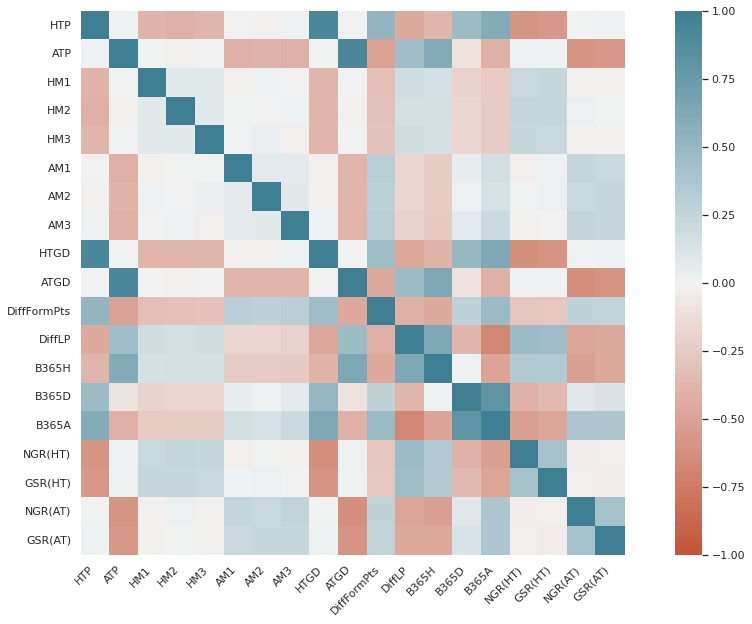

In [ ]:
# Visualizing how the features can separate the classes
sns.set(rc = {'figure.figsize':(18,10)})
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

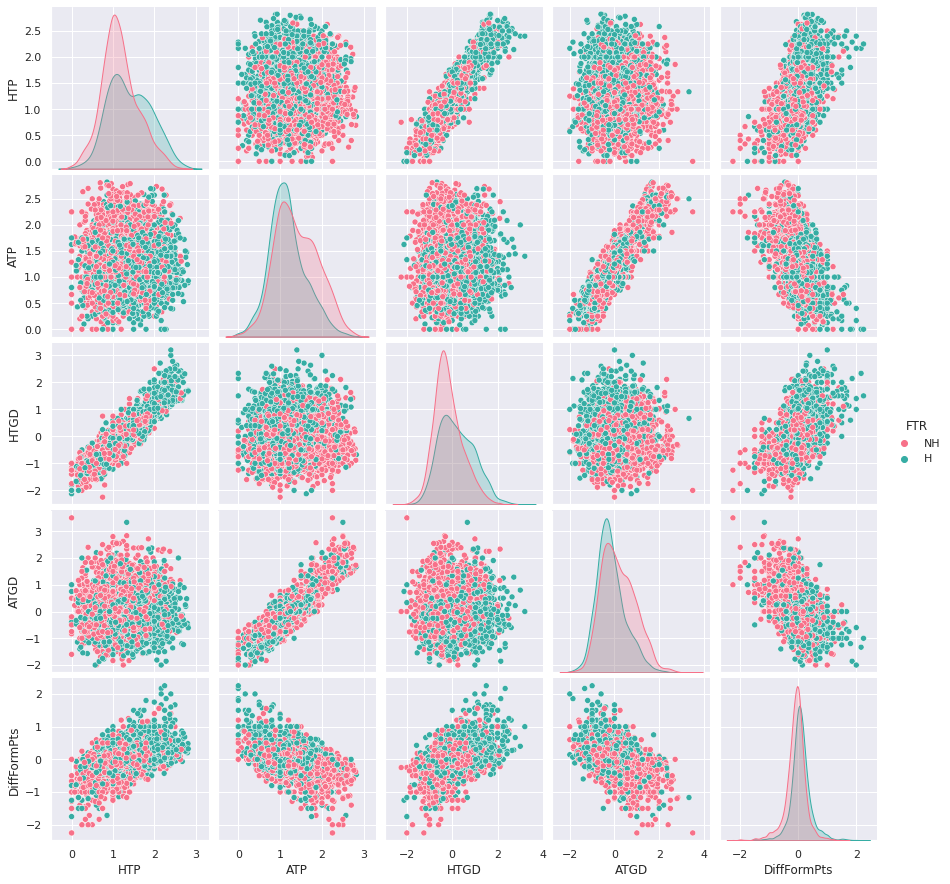

In [ ]:
# plot how the features classify the two classes
n = df_fea.shape[0]
sns.pairplot(df_fea[['HTP','ATP','HTGD','ATGD','DiffFormPts','FTR']][0:n], hue='FTR', vars=['HTP','ATP','HTGD','ATGD','DiffFormPts'], palette="husl")
plt.show()

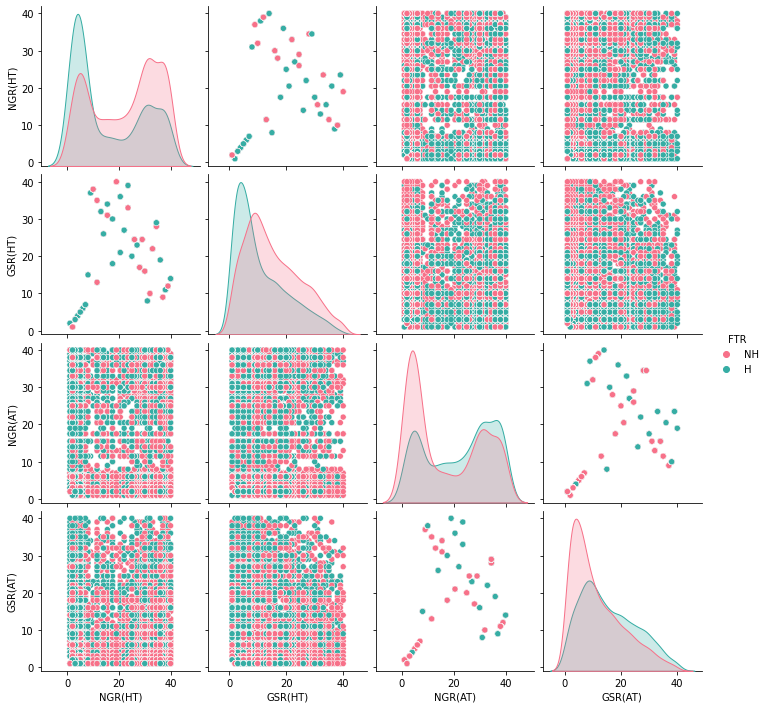

In [ ]:
n = df_fea.shape[0]
sns.pairplot(df_fea[['NGR(HT)','GSR(HT)','NGR(AT)','GSR(AT)','FTR']][0:n], hue='FTR', vars=['NGR(HT)','GSR(HT)','NGR(AT)','GSR(AT)'], palette="husl")
plt.show()

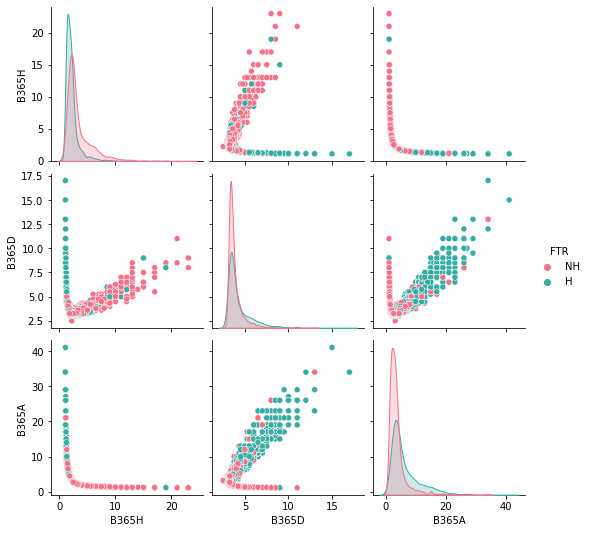

In [ ]:
n = df_fea.shape[0]
sns.pairplot(df_fea[['B365H','B365D','B365A','FTR']][0:n], hue='FTR', vars=['B365H','B365D','B365A'], palette="husl")
plt.show()

In [ ]:
X.head()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,B365H,B365D,B365A,NGR(HT),GSR(HT),NGR(AT),GSR(AT)
0,0.221519,1.875000,2.0,1.0,2.0,0.0,0.0,0.0,0.229358,0.477273,0.222222,0.810811,0.190975,0.126207,0.013541,0.948718,0.25641,0.102564,0.102564
1,0.429613,1.787879,1.0,2.0,0.0,0.0,0.0,0.0,0.390603,0.523416,0.473064,0.648649,0.179581,0.103448,0.015797,0.948718,0.25641,0.102564,0.102564
2,0.354430,1.800000,1.0,1.0,2.0,0.0,1.0,0.0,0.366972,0.445455,0.444444,0.594595,0.134002,0.068966,0.019809,0.948718,0.25641,0.102564,0.102564
3,0.447702,1.763158,0.0,2.0,0.0,2.0,2.0,0.0,0.441816,0.502392,0.535088,0.729730,0.122607,0.075862,0.020812,0.948718,0.25641,0.102564,0.102564
4,0.354430,1.500000,2.0,0.0,2.0,0.0,2.0,2.0,0.321101,0.636364,0.388889,0.567568,0.247949,0.103448,0.010281,0.948718,0.25641,0.102564,0.102564


In [ ]:
X.shape

(5600, 19)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA # Dimensionality Reduction with Pca

In [ ]:
# Applying pca and ploting the components
n_components =  3
pca = PCA(n_components=n_components)
X_pca2 = pca.fit_transform(X[num_fea])

total_var = pca.explained_variance_ratio_.sum() * 100
labels = {'0': 'PCA1', '1': 'PCA2', '2':'PCA3'}
labels['color'] = 'Target'

fig = px.scatter_matrix(
    X_pca2,
    color=df_fea.Target,
    dimensions=range(n_components),
    labels=labels,
    title=f"Total explained variance {total_var: .2f}%",
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# Number of Componenets 6 Explaines the Variance well
n_components =  6
pca = PCA(n_components=n_components)
X_pca3 = pca.fit_transform(X[num_fea])

total_var = pca.explained_variance_ratio_.sum() * 100
labels = {'0': 'PCA1', '1': 'PCA2', '2':'PCA3','3':'PCA4','4':'PCA5', '5': 'PCA6'}
labels['color'] = 'Target'

fig = px.scatter_matrix(
    X_pca3,
    color=df_fea.Target,
    dimensions=range(n_components),
    labels=labels,
    title=f"Total explained variance {total_var: .2f}%",
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
X_pca3 = pd.DataFrame(X_pca3)

In [ ]:
X_pca3.shape

(5600, 6)

In [ ]:
x_fin = X[cat_fea].join(X_pca3)

In [ ]:
x_fin.shape

(5600, 12)

In [ ]:
x_fin.head()

,HM1,HM2,HM3,AM1,AM2,AM3,0,1,2,3,4,5
0,2.0,1.0,2.0,0.0,0.0,0.0,-0.746688,0.104686,-0.178304,-0.162045,-0.197799,-0.045039
1,1.0,2.0,0.0,0.0,0.0,0.0,-0.583414,0.165018,-0.261024,-0.199826,0.060350,0.030045
2,1.0,1.0,2.0,0.0,1.0,0.0,-0.574691,0.121235,-0.263110,-0.176300,-0.001423,0.102975
3,0.0,2.0,0.0,2.0,2.0,0.0,-0.585231,0.173768,-0.260365,-0.207010,0.109012,-0.046377
4,2.0,0.0,2.0,0.0,2.0,2.0,-0.617679,0.160661,-0.244360,-0.194257,-0.048545,0.110734


In [ ]:
# Split the test and the train set in 70/30 ratio for fitting in to diffrent models
X_train, X_test, y_train, y_test = train_test_split(x_fin, y, test_size=0.3, random_state=1)

# Model 1 Logestic Regresion



In [ ]:
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, plot_confusion_matrix, confusion_matrix
import xgboost as xgb

In [ ]:
Lr = LogisticRegression(solver='lbfgs') # base line model

In [ ]:
def train_makeprediction_score(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  """Function that returns the accuracy and f1 score of the classifier we choose"""
  
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred,  average='micro')
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
 
  print(f"Accuracy of the classifer is {accuracy}")
  print(f"F1 score of the classifer is {f1}")
  print(f"precision score of the classifer is {precision}")
  print(f"recall score of the classifer is {recall}")
  return plot_confusion_matrix(clf, X_test, y_test)  

Accuracy of the classifer is 0.6648809523809524
F1 score of the classifer is 0.6648809523809524
precision score of the classifer is 0.684931506849315
recall score of the classifer is 0.7111597374179431


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


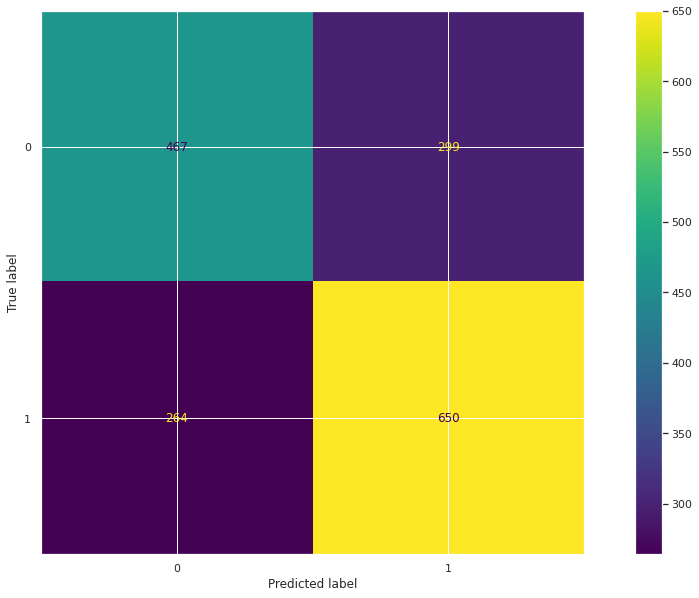

In [ ]:
train_makeprediction_score(Lr, X_train, y_train, X_test, y_test)

In [ ]:
# Tunning the hyperparameters
search_space = {
    'penalty' : ['l1', 'l2','elasticnet'],
    'solver' : ['lbfgs', 'newton-cg','liblinear','sag'],
    'max_iter' : [100, 1000, 2500, 5000] 
}

Lr_model = LogisticRegression()
GS = GridSearchCV(estimator=Lr_model, 
                 param_grid=search_space,
                 scoring='accuracy',
                 cv = 5,
                 verbose=4)

In [ ]:
GS.fit(x_fin, y)

In [ ]:
GS.best_params_ # best parameters for a good score

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
Lr_best = LogisticRegression(max_iter = 100, penalty='l1', solver='liblinear')

Accuracy of the classifer is 0.6857142857142857
F1 score of the classifer is 0.6857142857142857
precision score of the classifer is 0.6890243902439024
recall score of the classifer is 0.7533333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


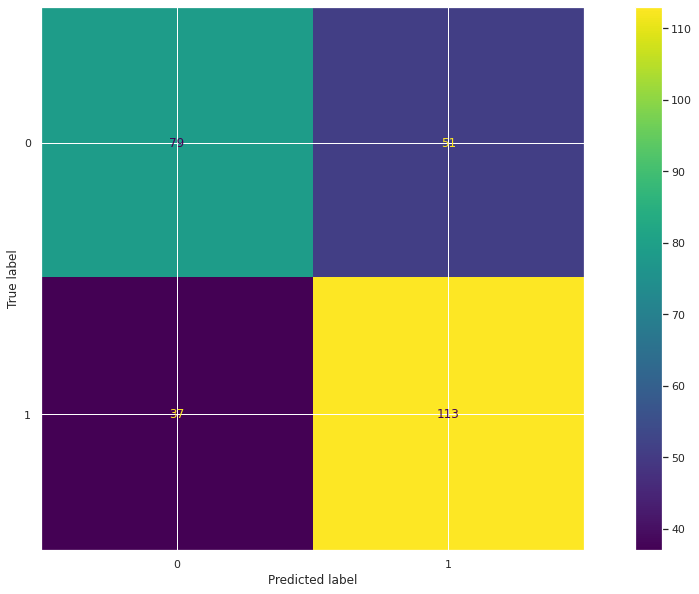

In [ ]:
train_makeprediction_score(Lr_best, X_train, y_train, X_test, y_test)


# Second Model


In [ ]:
# import Random forest classifier model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy of the classifer is 0.7142857142857143
F1 score of the classifer is 0.7142857142857143
precision score of the classifer is 0.7215189873417721
recall score of the classifer is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



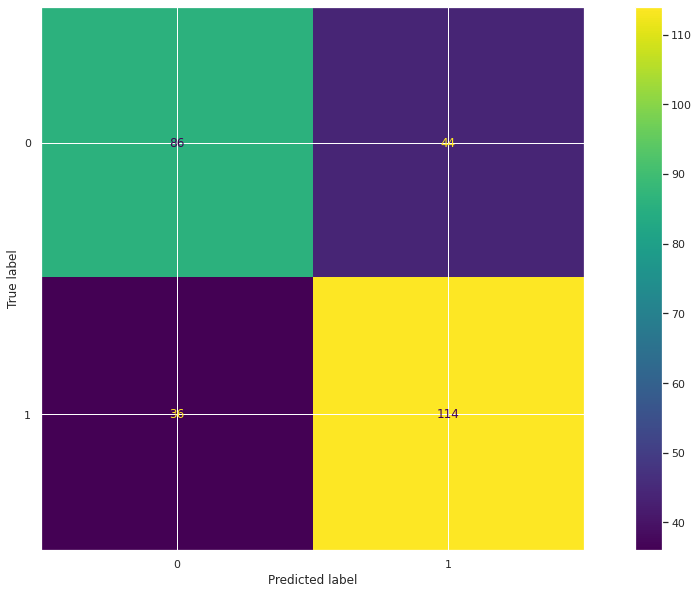

In [ ]:
train_makeprediction_score(rfc, X_train, y_train, X_test, y_test)

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

0      0.207814
1      0.128021
2      0.124232
4      0.119046
5      0.116850
3      0.115305
AM1    0.037350
HM1    0.035891
AM3    0.029472
HM2    0.028784
AM2    0.028623
HM3    0.028610
dtype: float64

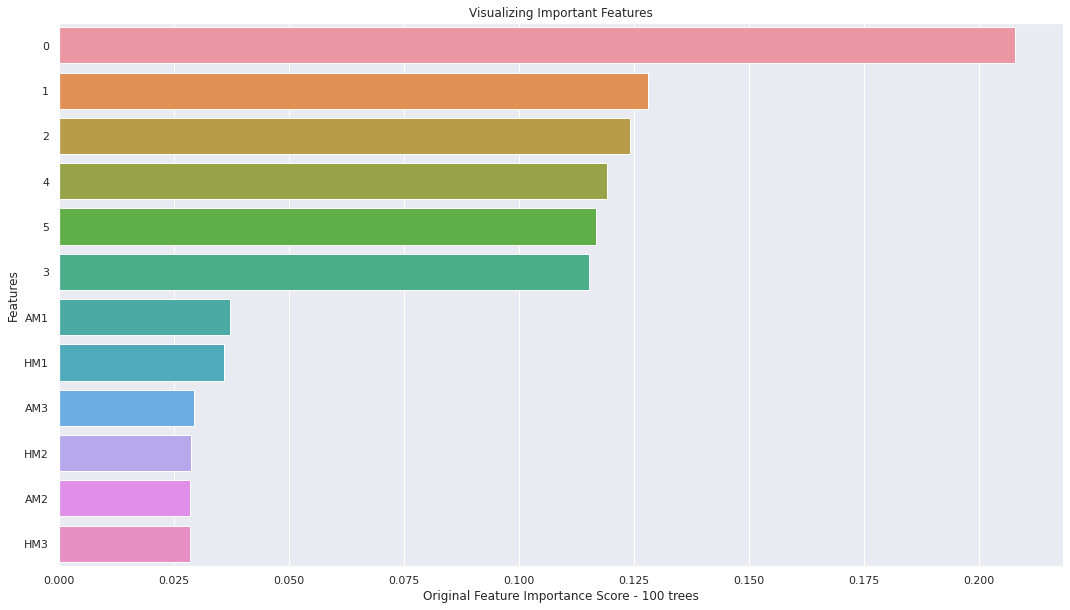

In [ ]:
# Creating a seaborn bar plot to see feature importance

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Original Feature Importance Score - 100 trees')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [ ]:
search_space = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3, 6, 9, 15],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2,5,10], 
    'bootstrap' : [True, False]
}
Rf = RandomForestClassifier()
GS = GridSearchCV(estimator=Rf, 
                 param_grid=search_space,
                 scoring='accuracy',
                 cv = 5,
                 verbose=4)

In [ ]:
GS.fit(x_fin, y)

In [ ]:
GS.best_params_

{'bootstrap': False,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
Rf_best = RandomForestClassifier(bootstrap = False,
                                  max_depth = 3,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  n_estimators = 1000)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


Accuracy of the classifer is 0.6785714285714286
F1 score of the classifer is 0.6785714285714286
precision score of the classifer is 0.6807228915662651
recall score of the classifer is 0.7533333333333333


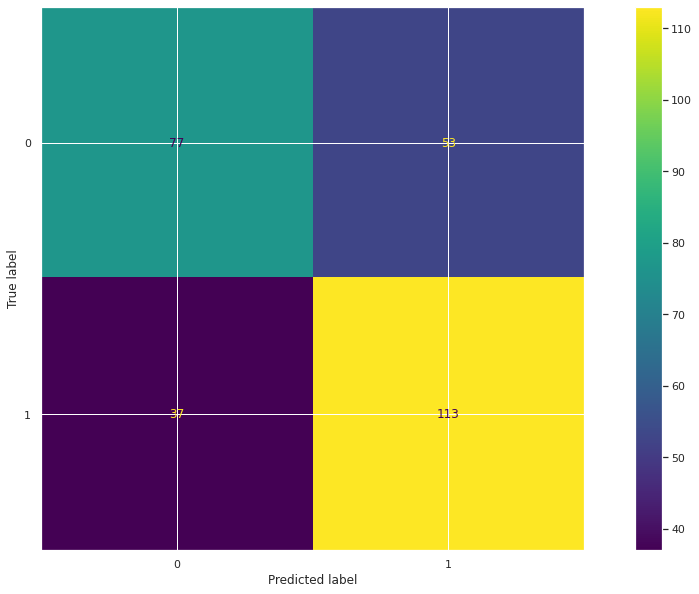

In [ ]:
train_makeprediction_score(Rf_best, X_train, y_train, X_test, y_test)

# Third model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 912)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy of the classifer is 0.6892857142857143
F1 score of the classifer is 0.6892857142857143
precision score of the classifer is 0.6842105263157895
recall score of the classifer is 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



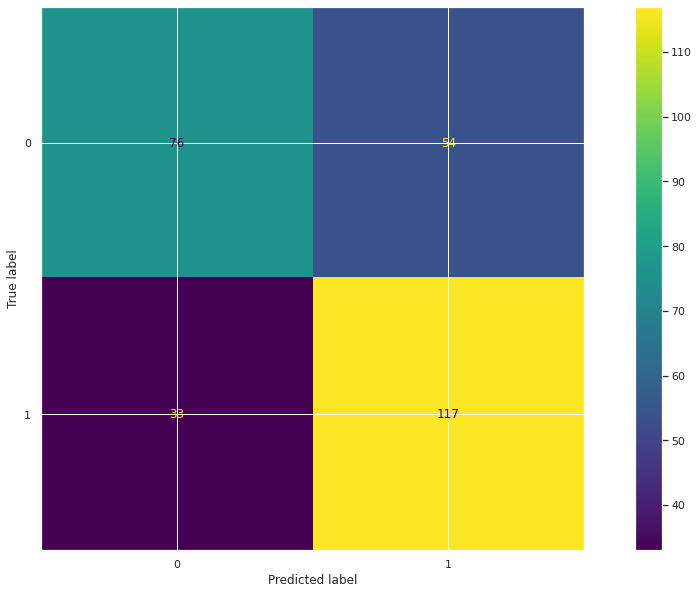

In [ ]:
train_makeprediction_score(svm, X_train, y_train, X_test, y_test)

In [ ]:
search_space = {
    'kernel' : ['linear', 'rbf','sigmoid'],
    'degree' : [1, 3,  6],
    'coef0' : [0.01, 0.5, 1], 
    'gamma' : ['auto', 'scale']
}

SVM_model = SVC()
GS = GridSearchCV(estimator=SVM_model, 
                 param_grid=search_space,
                 scoring='accuracy',
                 cv = 5,
                 verbose=4)

In [ ]:
GS.fit(x_fin, y)

In [ ]:
GS.best_params_

{'coef0': 0.01, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
svm_best = SVC(coef0 = 0.01, degree = 1, gamma = 'auto', kernel = 'rbf', probability=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy of the classifer is 0.6892857142857143
F1 score of the classifer is 0.6892857142857143
precision score of the classifer is 0.6820809248554913
recall score of the classifer is 0.7866666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



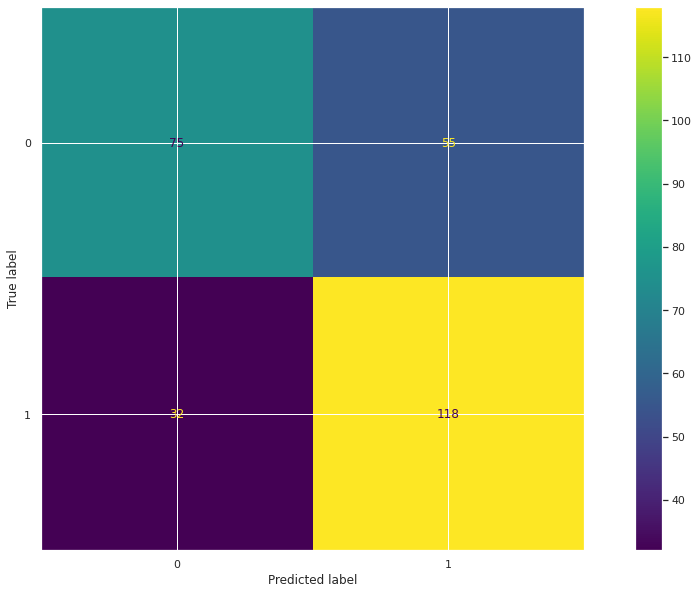

In [ ]:
train_makeprediction_score(svm_best, X_train, y_train, X_test, y_test)

# Fourth model

In [ ]:
import xgboost as xgb
xgb_mod = xgb.XGBClassifier()

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:13:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the classifer is 0.6642857142857143
F1 score of the classifer is 0.6642857142857143
precision score of the classifer is 0.6866666666666666
recall score of the classifer is 0.6866666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



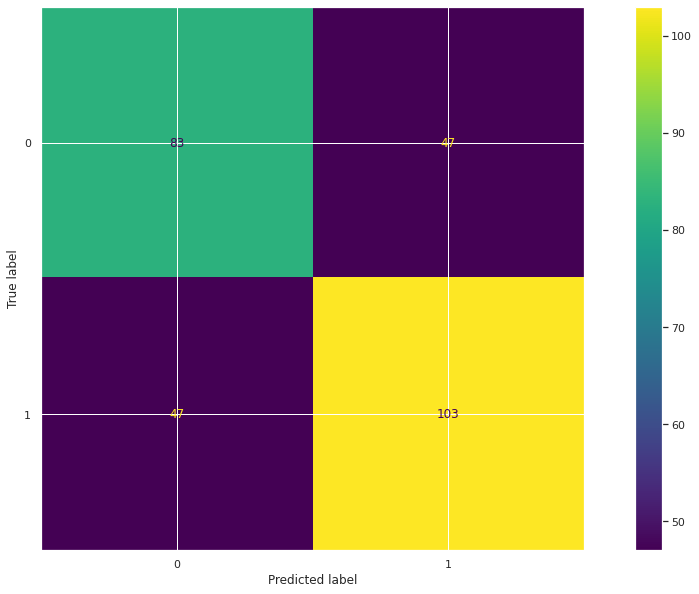

In [ ]:
train_makeprediction_score(xgb_mod, X_train, y_train, X_test, y_test)

In [ ]:
search_space = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3, 6, 9],
    'learning_rate' : [0.001, 0.01, 0.1, 1],
    'subsample' : [0.08, 0.8],
    'min_child_weight': [1, 2, 3, 4], 
    'gamma' : [0.01, 0.1, 1]
}

In [ ]:
XGB_model = xgb.XGBClassifier()
GS = GridSearchCV(estimator=XGB_model, 
                 param_grid=search_space,
                 scoring='accuracy',
                 cv = 5,
                 verbose=4)

In [ ]:
GS.fit(x_fin, y)

In [ ]:
GS.best_params_

{'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 200,
 'subsample': 0.08}

In [ ]:
XGB_model_best = xgb.XGBClassifier(parameters = { 
               'learning_rate' : [0.01],
               'n_estimators' : [1000],
               'max_depth': [3],
               'min_child_weight': [4],
               'gamma':[1],
               'subsample' : [0.08],
            }  )

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:13:18] WARNING: ../src/learner.cc:576: 
Parameters: { "parameters" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:13:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the classifer is 0.6642857142857143
F1 score of the classifer is 0.6642857142857143
precision score of the classifer is 0.6866666666666666
recall score of the classifer is 0.6866666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



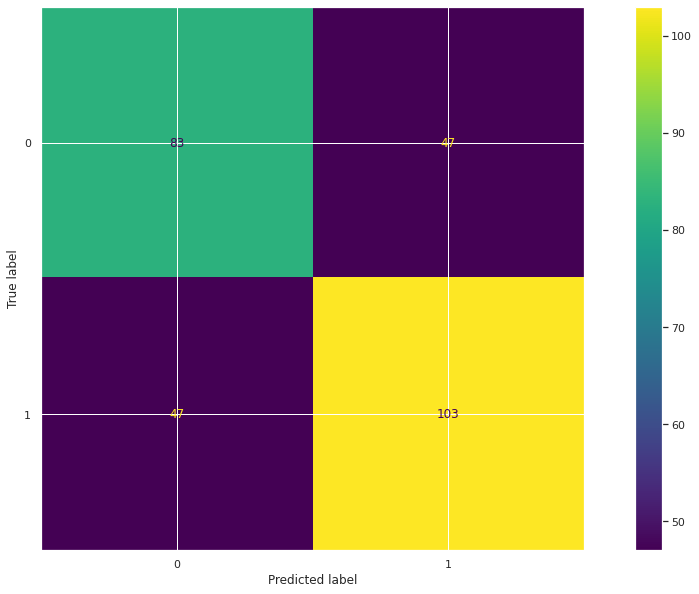

In [ ]:
train_makeprediction_score(XGB_model_best, X_train, y_train, X_test, y_test)

# Ensemble Models


In [ ]:
# import the Voting classifier fromn Sklearn
from sklearn.ensemble import VotingClassifier

In [ ]:
# create ensemble model with different models
VC = VotingClassifier([('clf1',Rf_best),('clf2', svm_best)], voting='soft')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy of the classifer is 0.675
F1 score of the classifer is 0.675
precision score of the classifer is 0.6745562130177515
recall score of the classifer is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



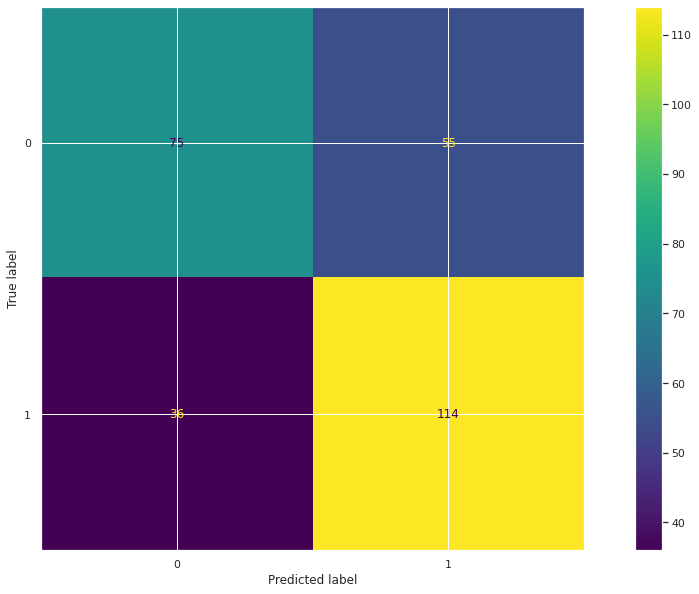

In [ ]:
# train and test the ensambe model
train_makeprediction_score(VC, X_train, y_train, X_test, y_test)

# Neural Networks


In [ ]:
# import packages from keras
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
import seaborn as sns

In [ ]:
X.head()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,B365H,B365D,B365A,NGR(HT),GSR(HT),NGR(AT),GSR(AT)
0,0.221519,1.875000,2.0,1.0,2.0,0.0,0.0,0.0,0.229358,0.477273,0.222222,0.810811,0.190975,0.126207,0.013541,0.948718,0.25641,0.102564,0.102564
1,0.429613,1.787879,1.0,2.0,0.0,0.0,0.0,0.0,0.390603,0.523416,0.473064,0.648649,0.179581,0.103448,0.015797,0.948718,0.25641,0.102564,0.102564
2,0.354430,1.800000,1.0,1.0,2.0,0.0,1.0,0.0,0.366972,0.445455,0.444444,0.594595,0.134002,0.068966,0.019809,0.948718,0.25641,0.102564,0.102564
3,0.447702,1.763158,0.0,2.0,0.0,2.0,2.0,0.0,0.441816,0.502392,0.535088,0.729730,0.122607,0.075862,0.020812,0.948718,0.25641,0.102564,0.102564
4,0.354430,1.500000,2.0,0.0,2.0,0.0,2.0,2.0,0.321101,0.636364,0.388889,0.567568,0.247949,0.103448,0.010281,0.948718,0.25641,0.102564,0.102564


In [ ]:
X.shape

(5600, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# build a feed forward neural network model
model = Sequential()
model.add(Dense(12, input_dim=19, activation='relu'))
model.add(Dropout(0.2)) # add drop out to avoid overfitting
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile our model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                240       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                260       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# hit the model
history = model.fit(X_train, y_train, epochs=300, batch_size=12, validation_data= (X_test, y_test))

In [ ]:
# see the score of the model
score = model.evaluate(X_test, y_test)
print(f"Accuracy score = {score}" )

53/53 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.6899
Accuracy score = [0.6016759872436523, 0.6898809671401978]


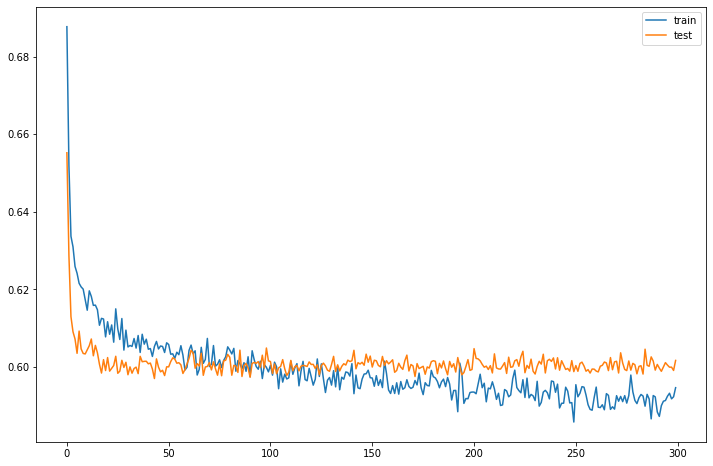

In [ ]:
#plot the result of the model
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
def create_model():
  """creates our Neural network model"""
  model = Sequential()
  model.add(Dense(12, input_dim=19, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(20, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  # compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model 

In [ ]:
model = KerasClassifier(build_fn=create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
# list out different parameters
batch_size = [20, 40, 80, 100]
epochs = [100, 150, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X, y)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data= (X_test, y_test))

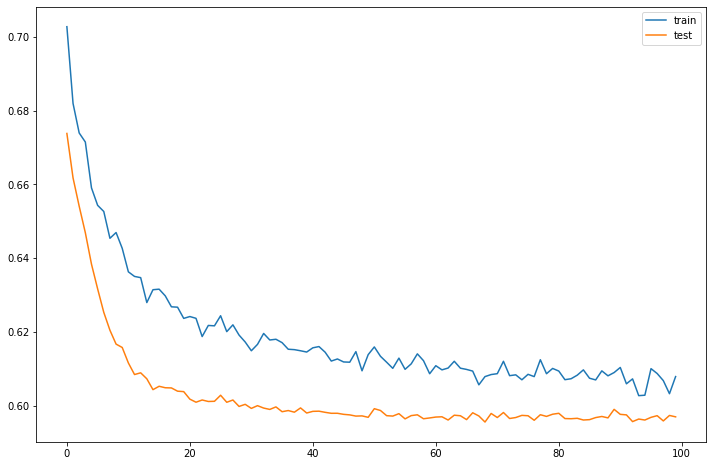

In [ ]:
# plot the result
plt.figure(figsize=(12, 8))
plt.plot(best_history.history['loss'], label='train')
plt.plot(best_history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Pipeline and pickle

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
# create refrence for the pipline
st = StandardScaler()
pca = PCA(n_components = 6)
OE = OrdinalEncoder(categories=[['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L'],['W','D','L']])

In [ ]:
# create numeric pipline to pre process the numreic data
numeric_pipeline = Pipeline([('scaling', st),
                                ('pca', pca)])

In [ ]:
# create catagorical pipline to pre process Catagorical data
categorical_pipeline = Pipeline([('Oridinal_Encode', OE)])


In [ ]:
union = FeatureUnion([('numeric_pipeline', numeric_pipeline),
                      ('categorical_pipeline', categorical_pipeline)
                     ])

In [ ]:
preprocessing_df = ColumnTransformer([('numeric', numeric_pipeline, num_fea), 
                                    ('categorical', categorical_pipeline, cat_fea)])

In [ ]:
pipeline_RF = Pipeline(steps=[('preprocessing', preprocessing_df),
                           ('classifier', RandomForestClassifier(bootstrap = False,
                                  max_depth = 3,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  n_estimators = 500))])

In [ ]:
# Create a test data for the pipline
X_pip = df_fea.drop(columns=['index','Date','HomeTeam','AwayTeam','FTR','Target'])
y = df_fea['Target']

In [ ]:
X_pip.head(2)

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,B365H,B365D,B365A,NGR(HT),GSR(HT),NGR(AT),GSR(AT)
0,0.625000,1.875000,L,D,L,W,W,W,-1.000000,0.625000,-1.250000,12.0,5.25,4.33,1.66,38.0,11.0,5.0,5.0
1,1.212121,1.787879,D,L,W,W,W,W,-0.121212,0.878788,-0.121212,6.0,5.00,4.00,1.75,38.0,11.0,5.0,5.0


In [ ]:
X_pipt, X_piptest, y_piptrain, y_piptest = train_test_split(X_pip, y, test_size=0.05, random_state=1)

In [ ]:
# Train the pipline with the data
pipeline_RF.fit(X_pipt, y_piptrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=6))]),
                                                  ['HTP', 'HTGD', 'ATGD',
                                                   'DiffFormPts', 'DiffLP',
                                                   'NGR(HT)', 'GSR(HT)',
                                                   'NGR(AT)', 'GSR(AT)',
                                                   'B365H', 'B365D', 'B365A']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Oridinal_Encode',
                                                 

Accuracy of the classifer is 0.6857142857142857
F1 score of the classifer is 0.6857142857142857
precision score of the classifer is 0.6867469879518072
recall score of the classifer is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



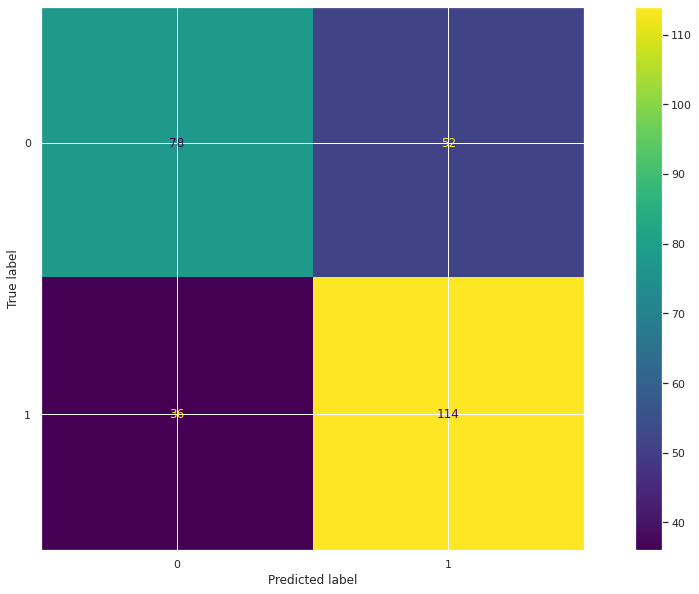

In [ ]:
# Test the pipline with the row test data created
train_makeprediction_score(pipeline_RF, X_pipt, y_piptrain, X_piptest, y_piptest)

In [ ]:
import pickle

In [ ]:
# Save the models
with open('pipeline_RF.pickle', 'wb') as f:
    pickle.dump(pipeline_RF, f)